# Variance - Bias Tradeoff

Every estimator has its advantages and drawbacks. Its generalization error can be decomposed in terms of bias, variance and noise. The **bias** of an estimator is its average error for different training sets. The **variance** of an estimator indicates how sensitive it is to varying training sets. Noise is a property of the data.

Bias and variance are inherent properties of estimators and we usually have to select learning algorithms and hyperparameters so that both bias and variance are as low as possible. Another way to reduce the variance of a model is to use more training data. However, you should only collect more training data if the true function is too complex to be approximated by an estimator with a lower variance.

To help you to distingush between validation curve and learning curve. 

* Validation curve: Check the impact of a hyperparameter on training score and validation score. The score is usually based on a performance metric (E.g., $R^2$). **A good method to check against overfitting**.


* Learning curve: Check the impact of sample size on training and validation score. [scikit-learn] It is a tool to find out how much we benefit from **adding more training data** and whether the estimator suffers more from a variance error or a bias error.

## Validation Curve

Let's start with an example from scikit-learn doc

In [1]:
import pandas as pd    # Import Pandas
import numpy as np     # Import Numpy, 
import seaborn as sns  # Import Seaborn, visualisation library
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

Automatically created module for IPython interactive environment


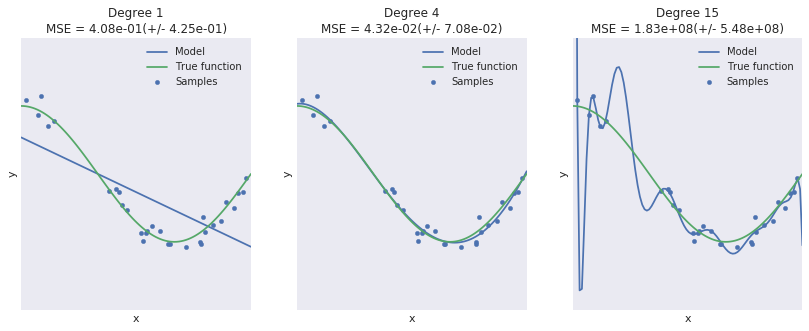

In [2]:
# Source: scikit-learn
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show();


Importing usual library

* For identification of over- and under-fitting
* Plotting training and validation scores vs model parameters



### Validation Curve for Ridge Regression

In [3]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
iris = load_iris()
X, y = iris.data, iris.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_name = "alpha"
param_range = np.logspace(-5, 2, 10)

train_scores, valid_scores = validation_curve(Ridge(), 
                                              X, 
                                              y, 
                                              param_name,
                                              param_range,
                                              scoring='r2',
                                              cv = 3)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[[0.94141575 0.92944161 0.92267644]
 [0.94141575 0.92944161 0.92267644]
 [0.94141575 0.92944161 0.92267644]
 [0.94141574 0.92944161 0.92267643]
 [0.94141555 0.92944147 0.92267627]
 [0.94140905 0.92943672 0.92267062]
 [0.94122796 0.92929956 0.92250918]
 [0.93864928 0.92720953 0.9201652 ]
 [0.92516976 0.91623535 0.90866735]
 [0.87947046 0.87281594 0.86003406]]
[[0.90335828 0.92525982 0.94159335]
 [0.90335841 0.92525969 0.94159334]
 [0.90335923 0.92525892 0.94159327]
 [0.90336411 0.92525427 0.94159282]
 [0.90339309 0.9252264  0.94158999]
 [0.9035563  0.92505845 0.94156839]
 [0.90425122 0.92403578 0.94131162]
 [0.90492661 0.91834258 0.93850378]
 [0.89750235 0.89783134 0.92867312]
 [0.85024272 0.8334692  0.90023046]]


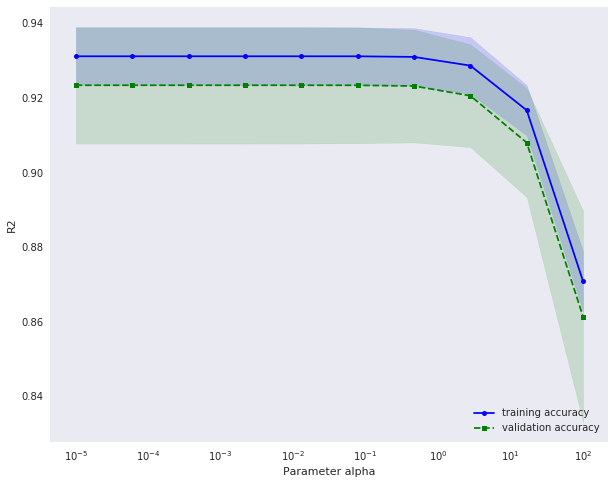

In [4]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('R2')
#plt.ylim([0.8, 1.0])
plt.show()

### [Plotting Validation Curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py)

In this plot you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. 

For very low values of gamma, you can see that both the training score and the validation score are low. This is called **underfitting**. 

Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well. 

If gamma is too high, the classifier will **overfit**, which means that the training score is good but the validation score is poor.

In [5]:
print(__doc__)

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", 
                                             param_range=param_range,
                                             cv=10, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


Automatically created module for IPython interactive environment


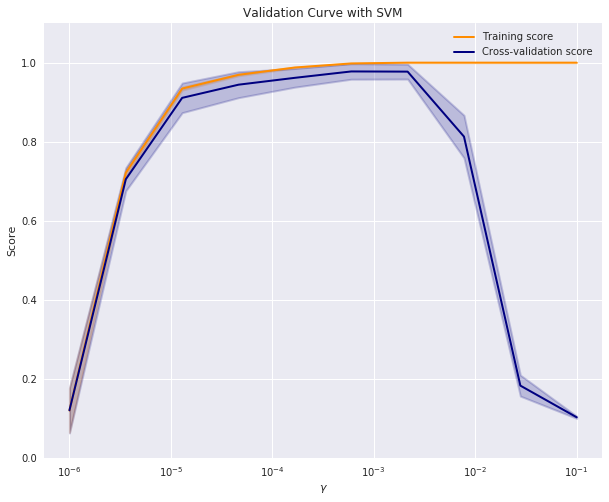

In [6]:
plt.figure(figsize=(10,8))
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Learning Curve

* Shows the validation and training score of an estimator for varying numbers of training samples. 

* A tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. 

* If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. 


### Example of a Good Variance Bias Trade off Learning Curve



Below is an example of a good variance bias trade off learning curve.

* The actual level of performance (E.g., Accuracy or $R^2$ score) achieved is close to desired level of performance

* The training and test (validation curve) are tight and converge to similar level

<img style="float: left;" src="Good.PNG"  height=50%, width=50%>

### Example of a High Bias Learning Curve

Below is an example of a High Bias learning curve.

* Low training and test accuracy / score. I.e., Underfits the training data
* The actual performance (E.g., Accuracy or $R^2$ score) level is far from the desired level of performance

Address by:
* Increase the number of parameters - Adding or creating new feature
* Decrease regularisation


<img style = "float: left;" src="Bias.PNG"  height=50%, width=50%>

### Example of a High Variance Learning Curve

Below is an example of a High Variance learning curve.

* The training and test level do not converge or converge slowly
* The training and test level are still very far apart. I.e., This is an example of overfitting

Address by:
* Collect more training data
* Reduce model complexity
* Increase regularisaiton

<img style="float: left;" src="Variance.PNG" height=50%, width=50%>

#### In summary we look for:


* **Bias**
    * Evaluate via score / accuracy level
    
    
* **Variance**
    * Evaluate via the convergence speed and distance between training score / accuracy level and test score / accuracy level

### Learning Curves Example from Scikit-Learn

The example below is from scikit-learn documentation website



**General observations of learning curves**:

  * The training score is very high at the beginning and decreases 
  * The cross-validation score is very low at the beginning and increases. 



**Key observations for Naive Bayes Classifier**:

  * Both the training score and the cross-validation score are not very good at the end




**Key observation for SVM**:

  * The training score is still around the maximum 
  * The validation score could be increased with more training samples.

Automatically created module for IPython interactive environment


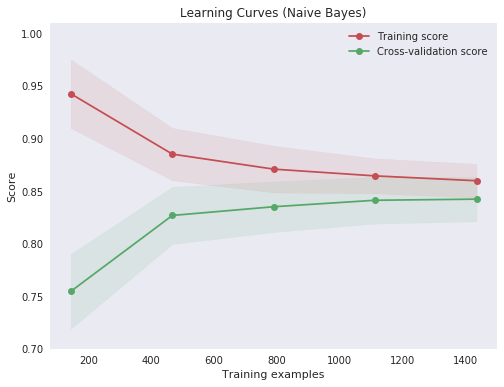

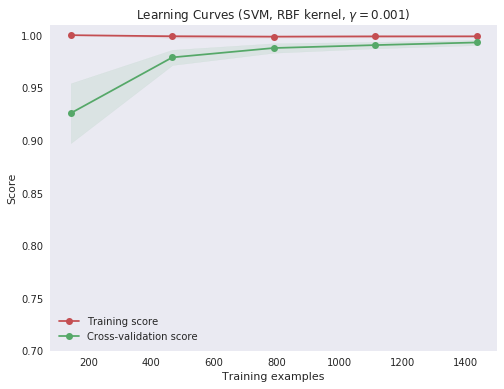

In [7]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(8,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, 
                    ylim=(0.7, 1.01), 
                    cv=cv, 
                    n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

## Keen to Learn More?

* [Scikit learn](http://scikit-learn.org/stable/modules/learning_curve.html)

* [Machine Learning Master](https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/)

* [Elite Data Science](https://elitedatascience.com/bias-variance-tradeoff)

* [Learning Curves for Machine Learning](https://www.dataquest.io/blog/learning-curves-machine-learning/)